In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures

In [8]:
x,y = load_diabetes(return_X_y=True)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [13]:
print("R2_Score =",r2_score(y_test,y_pred))
print("RMSE =",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score = 0.4399338661568969
RMSE = 55.627840795469155


In [14]:
print(lr.coef_)
print(lr.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [15]:
r = Ridge(alpha=1000)
r.fit(x_train,y_train)
y_pred = r.predict(x_test)

In [16]:
print("R2_Score =",r2_score(y_test,y_pred))
print("RMSE =",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score = -0.010136670498663625
RMSE = 74.70722683312947


In [17]:
print(r.coef_)
print(r.intercept_)

[ 0.29572556  0.06929029  0.76900381  0.59782445  0.28289952  0.22593551
 -0.49560691  0.52703134  0.7614959   0.47102907]
150.46479454828184


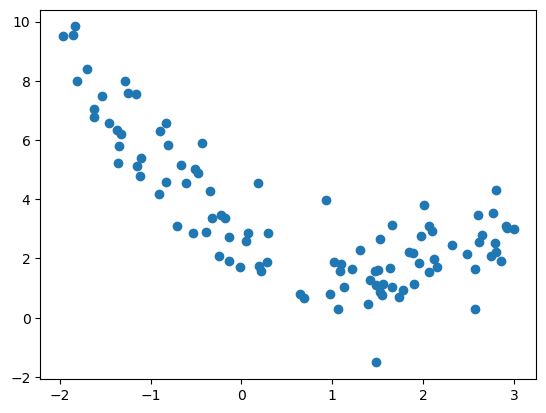

In [18]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

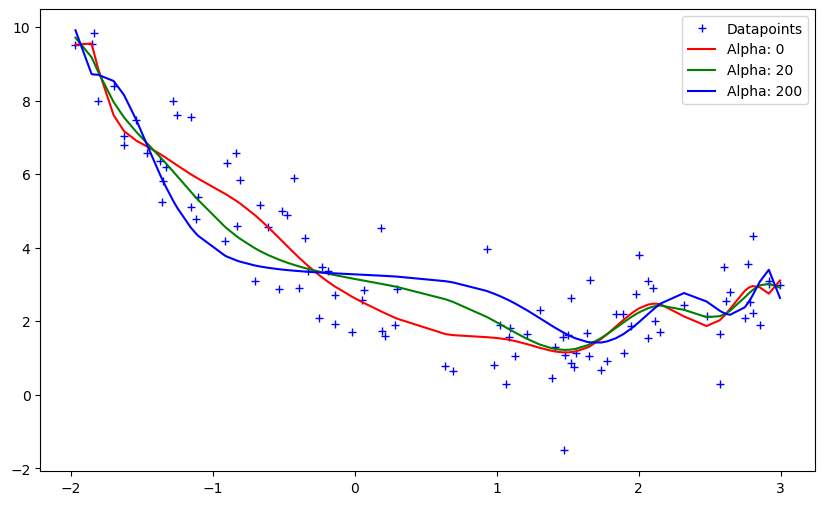

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()